In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df = pd.read_csv('train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


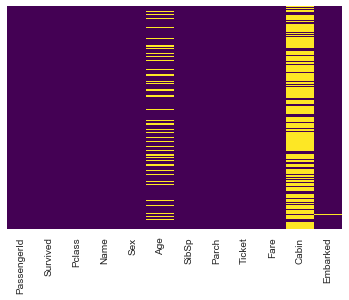

In [94]:
df.info()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

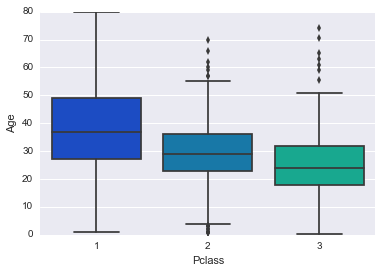

In [95]:
cols = ['Name','Ticket','Cabin']
df = df.drop(cols, axis=1)
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [96]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

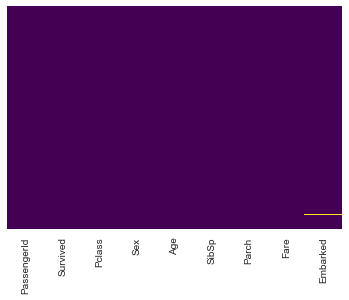

In [97]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))

In [99]:
titanic_dummies = pd.concat(dummies, axis=1)

In [100]:
titanic_dummies.head()

,1,2,3,female,male,C,Q,S
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [101]:
df = pd.concat((df, titanic_dummies),axis=1, copy=False)

In [102]:
df = df.drop(['Pclass','Sex','Embarked'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
1              891 non-null float64
2              891 non-null float64
3              891 non-null float64
female         891 non-null float64
male           891 non-null float64
C              891 non-null float64
Q              891 non-null float64
S              891 non-null float64
dtypes: float64(10), int64(4)
memory usage: 97.5 KB


In [103]:
X = df.values
y = df['Survived'].values
X = np.delete(X,1,axis=1)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=0)

In [106]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [107]:
clf = RandomForestClassifier(n_estimators=150)
clf2 = GradientBoostingClassifier()

In [108]:
clf.fit (X_train, y_train)
clf.score (X_test, y_test)

0.84647302904564314

In [109]:
clf2.fit (X_train, y_train)
clf2.score (X_test, y_test)

0.82987551867219922

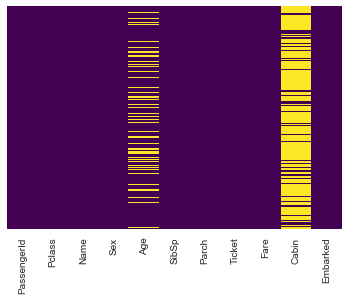

In [110]:
test = pd.read_csv('test.csv')
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

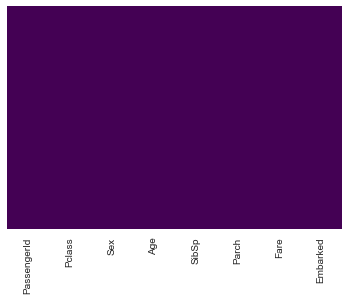

In [111]:
cols = ['Name','Ticket','Cabin']
test = test.drop(cols, axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [112]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(test[col]))

In [113]:
test_dummies = pd.concat(dummies, axis=1)
test = pd.concat((test,test_dummies),axis=1)

In [81]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,893,3,female,47.0,1,0,7.0000,S,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,894,2,male,62.0,0,0,9.6875,Q,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,895,3,male,27.0,0,0,8.6625,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,896,3,female,22.0,1,1,12.2875,S,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


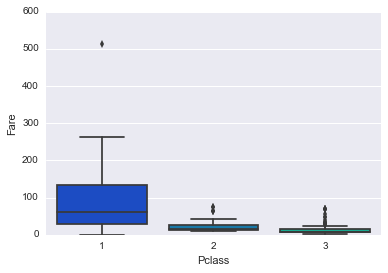

In [82]:
sns.boxplot(x='Pclass',y='Fare',data=test,palette='winter')

In [114]:
test['Fare'].fillna(value=test['Fare'].mean(), inplace=True)

In [84]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,893,3,female,47.0,1,0,7.0000,S,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,894,2,male,62.0,0,0,9.6875,Q,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,895,3,male,27.0,0,0,8.6625,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,896,3,female,22.0,1,1,12.2875,S,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [115]:
test = test.drop(['Pclass','Sex','Embarked'],axis=1)

In [116]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
1              418 non-null float64
2              418 non-null float64
3              418 non-null float64
female         418 non-null float64
male           418 non-null float64
C              418 non-null float64
Q              418 non-null float64
S              418 non-null float64
dtypes: float64(10), int64(3)
memory usage: 42.5 KB


In [117]:
#test2 = test.dropna(axis=0)
X = test.values

In [118]:
y_results = clf.predict(X)

In [119]:
output = np.column_stack((X[:,0],y_results))

In [120]:
df_results = pd.DataFrame(output.astype('int'),columns=['PassengerID','Survived'])

In [121]:
df_results.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [122]:
df_results.to_csv('titanic_results.csv',index=False)